In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
class bernouliBandit:
    # 多臂老虎机
    def __init__(self,num_arm):
        self.probabilities = np.random.uniform(0,1,size=num_arm)
        self.most_idx = np.argmax(self.probabilities)
        self.most_p = self.probabilities[self.most_idx]
        self.num_arm = num_arm

    def step(self,i):
        if random.random() < self.probabilities[i]:
            return 1
        return 0

In [4]:
# np.random.seed(1)
k = 10
bandit = bernouliBandit(k)
bandit.step(2), bandit.most_idx, bandit.most_p

(1, 5, 0.776959110447277)

In [5]:
bandit.probabilities

array([0.29664923, 0.22408982, 0.4430426 , 0.29006807, 0.22911981,
       0.77695911, 0.72099255, 0.17143545, 0.71960369, 0.0733143 ])

In [6]:
class solver:
    def __init__(self,bandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.num_arm)
        self.accumulate_regret = 0
        self.action_seq = []
        self.regrets = []

    def step(self):
        raise NotImplementedError
    
    def run(self,num_steps):
        for _ in range(num_steps):
            k, result = self.step()
            self.action_seq.append(k)
            self.counts[k] += 1
            self.accumulate_regret += (self.bandit.most_p - result)
            # self.accumulate_regret += (self.bandit.most_p - self.bandit.probabilities[k])
            self.regrets.append(self.accumulate_regret)

In [20]:
class epsGreedy(solver):
    def __init__(self,bandit,eps=0.01):
        super().__init__(bandit)
        self.eps = eps
        self.estimate = np.ones(self.bandit.num_arm)

    def step(self):
        if np.random.random() < self.eps:
            k = random.randint(0,self.bandit.num_arm - 1)
        else:
            k = np.argmax(self.estimate)
        result = self.bandit.step(k)
        self.estimate[k] += (result - self.estimate[k])/(self.counts[k] + 1)
        return k,result


In [8]:
def plot_results(solver_regrets,solver_names,num_arm):
    for i,regret in enumerate(solver_regrets):
        time_list = list(range(len(regret)))
        plt.plot(time_list,regret,label=solver_names[i])
    plt.xlabel('Time steps')
    plt.ylabel('regrets')
    plt.title('%d-armed bandit' % num_arm)
    plt.legend()
    plt.show()


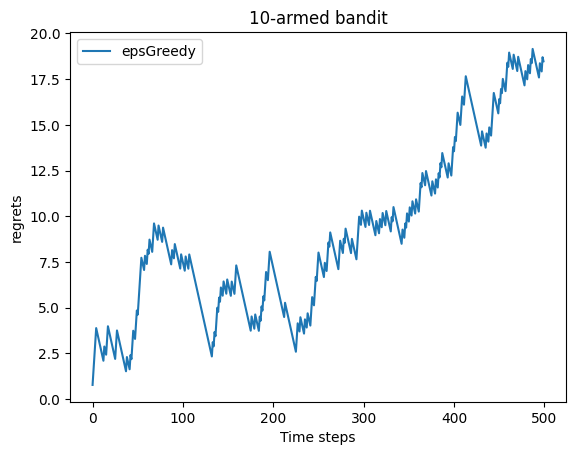

In [22]:
eps_greedy_solver = epsGreedy(bandit)
eps_greedy_solver.run(500)
plot_results([eps_greedy_solver.regrets],['epsGreedy'],10)

In [10]:
eps_greedy_solver.regrets,eps_greedy_solver.action_seq,eps_greedy_solver.bandit.probabilities

([0.776959110447277,
  1.553918220894554,
  2.330877331341831,
  3.107836441789108,
  3.8847955522363846,
  3.6617546626836615,
  3.4387137731309383,
  3.215672883578215,
  2.992631994025492,
  3.769591104472769,
  3.5465502149200456,
  4.323509325367323,
  5.1004684358146,
  5.877427546261877,
  6.654386656709153,
  6.43134576715643,
  7.208304877603707,
  6.985263988050984,
  6.762223098498261,
  7.539182208945538,
  7.316141319392814,
  7.093100429840091,
  6.870059540287368,
  7.647018650734645,
  7.423977761181922,
  7.200936871629199,
  6.977895982076475,
  6.754855092523752,
  6.531814202971029,
  6.308773313418306,
  6.085732423865583,
  5.86269153431286,
  6.6396506447601364,
  6.416609755207413,
  6.19356886565469,
  5.970527976101967,
  6.747487086549244,
  6.524446196996521,
  7.3014053074437975,
  7.078364417891074,
  6.855323528338351,
  6.632282638785628,
  6.409241749232905,
  6.186200859680182,
  5.9631599701274585,
  5.740119080574735,
  6.517078191022012,
  7.2940373

In [6]:
x = np.ones((10,10))
x[2,3] = 2
x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [47]:
class decay_epsGreedy(solver):
    def __init__(self,bandit):
        super().__init__(bandit)
        self.estimate = np.ones(self.bandit.num_arm)
        self.step_count = 0

    def step(self):
        self.step_count += 1
        if np.random.random() < 1/self.step_count:
            k = random.randint(0,self.bandit.num_arm - 1)
        else:
            k = np.argmax(self.estimate)
        result = self.bandit.step(k)
        self.estimate[k] += (result - self.estimate[k])/(self.counts[k] + 1)
        return k,result
    
class simulate_anneal(solver):
    def __init__(self,bandit):
        super().__init__(bandit)
        self.estimate = np.ones(self.bandit.num_arm)
        self.step_count = 0

    def step(self):
        self.step_count += 1
        k = random.randint(0,self.bandit.num_arm - 1)
        bk = np.argmax(self.estimate)
        print(np.exp(100*(self.estimate[k] - self.estimate[bk])/self.step_count))
        if k != bk and np.random.random() < np.exp(100*(self.estimate[k] - self.estimate[bk])/self.step_count):
            k = bk
        result = self.bandit.step(k)
        self.estimate[k] += (result - self.estimate[k])/(self.counts[k] + 1)
        return k,result
    

1.0
1.0
1.0
3.726653172078671e-06
1.0
1.0
1.0
1.0
1.4945338524781451e-05
1.0
1.0
1.0
1.0
1.0
1.0
0.0019304541362277093
1.0
0.24935220877729622
1.0
0.0820849986238988
0.008549309479686053
1.0
0.012934901388949791
1.0
0.36787944117144233
0.02136173917500705
1.0
0.2396510364417758
1.0
0.32919298780790557
0.03972373338644103
0.7066482778577161
0.3641821916336149
0.11015328833418854
1.0
0.06217652402211632
0.11507603880013943
1.0
0.1661487521034994
0.10539922456186439
0.37696242833189825
0.3775599276970477
0.46061450597143805
0.14615655707154254
0.45219092239655034
0.46006038999041154
0.16142603857670956
0.3357898230867381
0.1954104499097262
0.5352614285189905
0.20328684761600813
0.28880973055107395
0.21588296044904998
0.28936125184899186
0.22825936579963488
0.23436094380774908
0.6551229632409895
0.7630337550334091
0.26759853643691134
1.0
0.2988128332105549
0.5216175617763079
0.3291929878079056
0.5638783926131502
0.9500106810102682
0.4094841251523643
1.0
0.33724132002352386
0.40421955266300

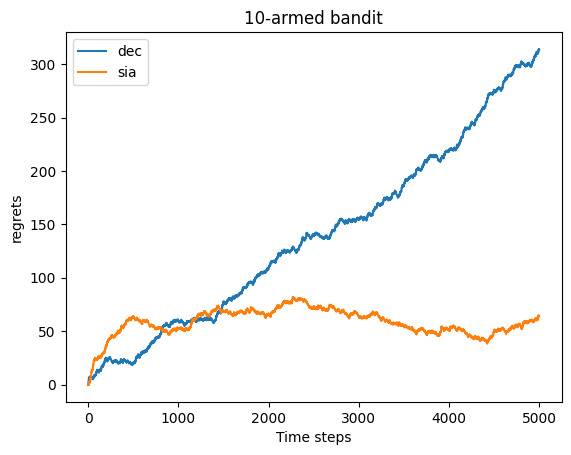

In [53]:
dec_eps_solver = decay_epsGreedy(bandit)
sia_solver = simulate_anneal(bandit)
dec_eps_solver.run(5000)
sia_solver.run(5000)
print('dec的累积懊悔:',dec_eps_solver.accumulate_regret)
print('sia的累积懊悔:',sia_solver.accumulate_regret)
plot_results([dec_eps_solver.regrets,sia_solver.regrets],['dec','sia'],10)

In [54]:
print(f'最好的老虎臂:{bandit.most_idx}, 最大的可能性:{bandit.most_p}')
print('probabilities:',bandit.probabilities)
print(sia_solver.action_seq)
print(dec_eps_solver.action_seq)

最好的老虎臂:5, 最大的可能性:0.776959110447277
probabilities: [0.29664923 0.22408982 0.4430426  0.29006807 0.22911981 0.77695911
 0.72099255 0.17143545 0.71960369 0.0733143 ]
[0, 0, 1, 0, 1, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5, 3, 5, 5, 5, 2, 3, 5, 4, 5, 1, 3, 6, 1, 6, 7, 7, 8, 0, 3, 8, 4, 9, 5, 3, 4, 5, 5, 5, 5, 1, 6, 7, 5, 5, 8, 9, 3, 9, 3, 4, 9, 5, 5, 4, 5, 4, 5, 4, 7, 5, 5, 5, 5, 5, 5, 3, 9, 0, 5, 5, 4, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 7, 5, 5, 5, 2, 5, 5, 5, 5, 5, 3, 5, 5, 5, 4, 4, 5, 5, 9, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 0, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 6, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 9, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 6, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 7, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [55]:
print(sia_solver.estimate)
print(dec_eps_solver.estimate)

[0.27777778 0.26086957 0.66666667 0.06060606 0.20588235 0.78633903
 0.75       0.23076923 0.71428571 0.05      ]
[0.5        0.33333333 0.5        0.33333333 0.         0.
 0.         0.         0.71569021 0.        ]
